# Лабабаторная работа № 6: Кластеризация

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Сформировать 3 различных датасета для кластеризации с помощью функции make_blobs (количество кластеров должно быть различным, размерность всех датасетов должна быть 2 - чтобы можно было визуализировать).

In [4]:
def macro_make_blobs(n_samples: list[int], n_features: list[int], centers: list[int]) -> list:
    return [make_blobs(n_samples=i, n_features=j, centers=k, random_state=42) for i, j, k in zip(n_samples, n_features, centers)]

In [5]:
list_of_blobs = macro_make_blobs([200, 300, 500], [2, 2, 2], [3, 5, 10])
list_of_blobs

[(array([[ 6.50565335,  2.4470026 ],
         [-5.12894273,  9.83618863],
         [-6.89187396, -7.77736396],
         [-8.32771153, -8.28757337],
         [-7.46899195, -6.0305075 ],
         [-6.13233359, -6.26973933],
         [-2.70155859,  9.31583347],
         [-7.3506655 , -6.64805966],
         [ 4.375222  ,  4.69333885],
         [-6.06676507, -6.25048075],
         [ 3.71294836,  1.91364433],
         [ 4.86733877,  3.28031244],
         [ 5.72293008,  3.02697174],
         [ 4.15451529,  2.05504382],
         [ 2.61473625,  2.159624  ],
         [-7.7086222 , -7.44029063],
         [-2.58120774, 10.01781903],
         [-7.70184759, -6.63642238],
         [ 5.32613903,  0.36045381],
         [-5.29361038, -8.11792509],
         [ 6.76203503,  3.00563494],
         [ 4.16493353,  1.31984045],
         [-6.55690863, -7.70734054],
         [-2.44166942,  7.58953794],
         [-6.19767422, -7.19037635],
         [-3.18611962,  9.62596242],
         [-3.6601912 ,  9.38998415],
 

визуализировать датасет

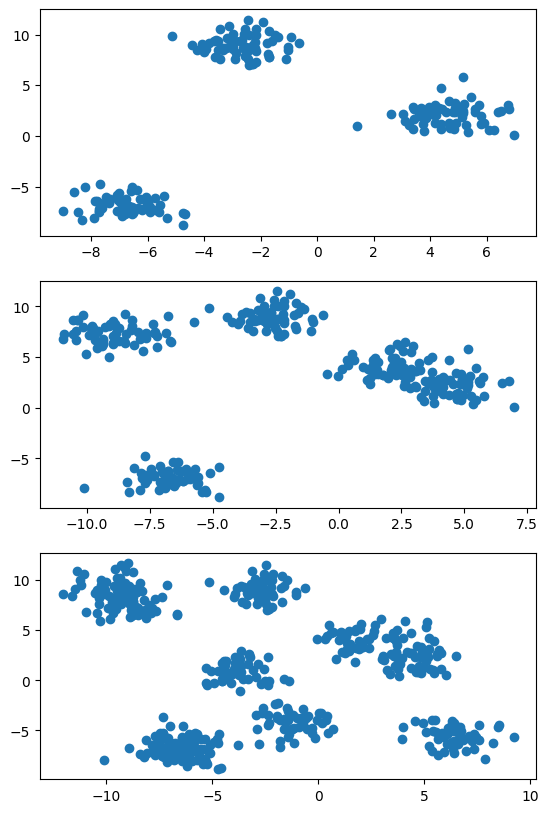

In [6]:
def scatter_blobs(blobs):
    fig, axs = plt.subplots(3)
    for i in range(len(blobs)):
        axs[i].scatter(blobs[i][0][:,0], blobs[i][0][:,1])
    fig.set_figheight(10)
scatter_blobs(list_of_blobs)

выполнить кластеризацию с помощью алгоритма KMeans

In [7]:
def macro_kmeans(blobs, centers: list[int]) -> list:
    return [KMeans(j, n_init='auto').fit(i[0]) for i, j in zip(blobs, centers)]

list_of_kmeans = macro_kmeans(list_of_blobs, [3, 5, 10])

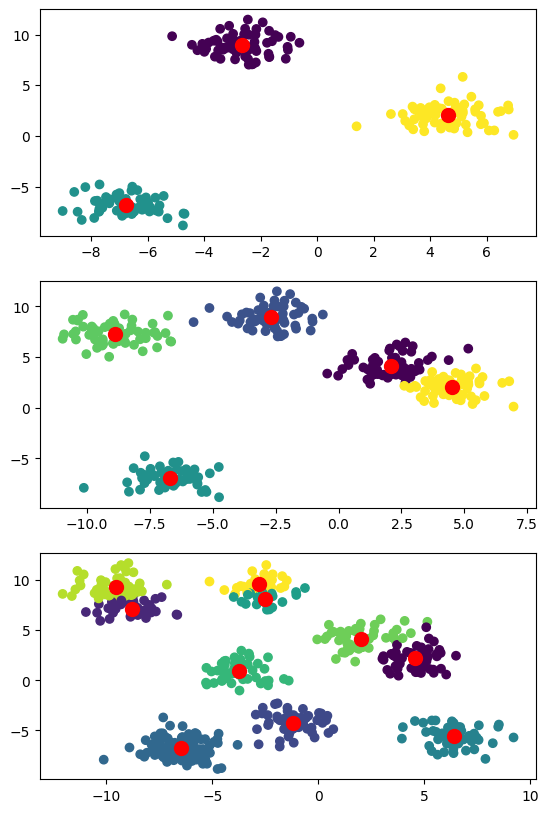

In [8]:
def scatter_kmeans(blobs, kmeans):
    fig, axs = plt.subplots(3)
    for i in range(len(blobs)):
        axs[i].scatter(blobs[i][0][:,0], blobs[i][0][:,1], c=kmeans[i].labels_)
        axs[i].scatter(kmeans[i].cluster_centers_[:,0], kmeans[i].cluster_centers_[:,1], s=100, c='red')
    fig.set_figheight(10)

scatter_kmeans(list_of_blobs, list_of_kmeans)

подобрать оптимальное количество кластеров по значению суммы квадратов расстояний до центроидов

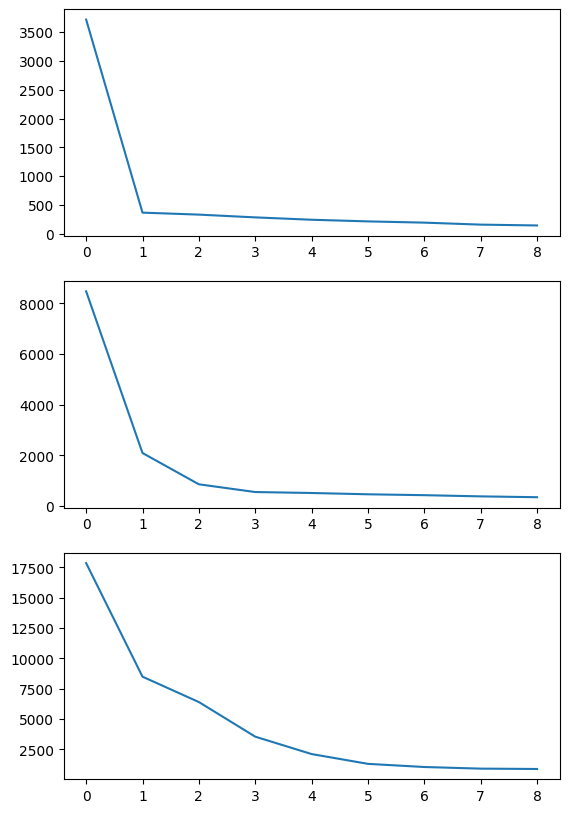

In [9]:
def inertias_visualise(blobs):
    fig, axs = plt.subplots(len(blobs))
    for i in range(len(blobs)):
        inertias = []
        for j in range(2, 11):
            km = KMeans(j, n_init='auto').fit(blobs[i][0])
            inertias.append(km.inertia_)
        axs[i].plot(inertias)        
    fig.set_figheight(10)
    
inertias_visualise(list_of_blobs)

В первом случае эффективно использовать три центроида, во втором - 3 или 4, в третьем 7

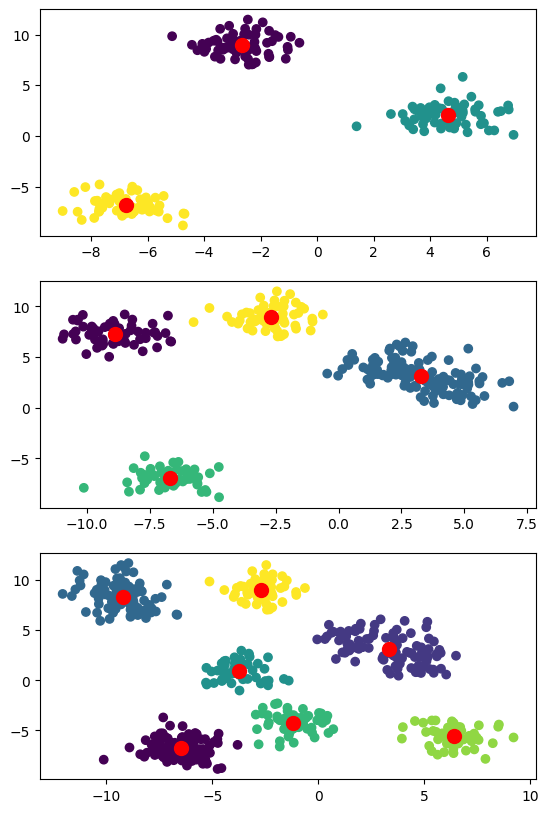

In [10]:
list_of_kmeans = macro_kmeans(list_of_blobs, [3, 4, 7])    
scatter_kmeans(list_of_blobs, list_of_kmeans)

подобрать оптимальное количество кластеров по значению коэффициента силуета

In [11]:
def macro_silhouettes(blobs, kmeans):
    return [silhouette_score(i[0], j.labels_) for i, j in zip(blobs, kmeans)]

macro_silhouettes(list_of_blobs, list_of_kmeans)

[0.8467003894636074, 0.7322627999895094, 0.684335357897129]

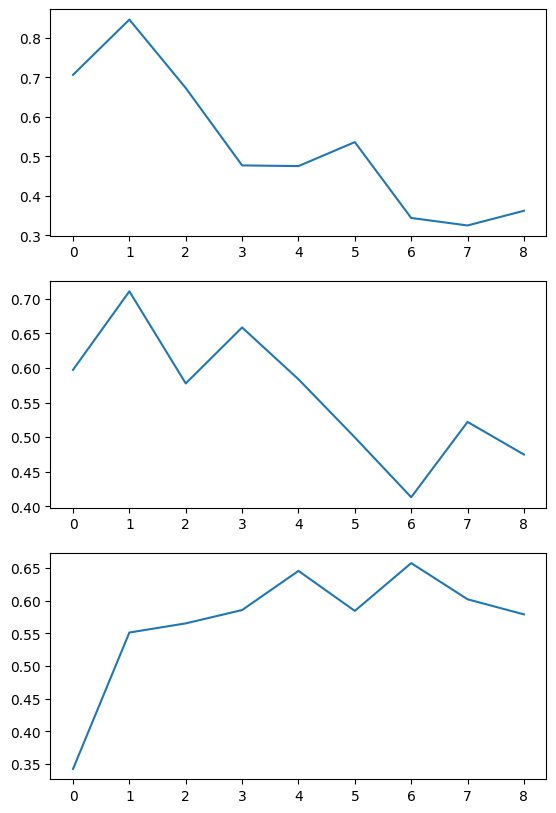

In [12]:
def silhouettes_visualise(blobs, kmeans):
    fig, axs = plt.subplots(len(blobs))
    for k in range(len(blobs)):  
        ss = []
        for j in range(2, 11):
            km = KMeans(j, n_init='auto').fit(blobs[k][0]).labels_
            ss.append(silhouette_score(blobs[k][0], km))
        axs[k].plot(ss)
    fig.set_figheight(10)
silhouettes_visualise(list_of_blobs, list_of_kmeans)

Для первого - 3, для второго - 3 или 5, для третьего 7

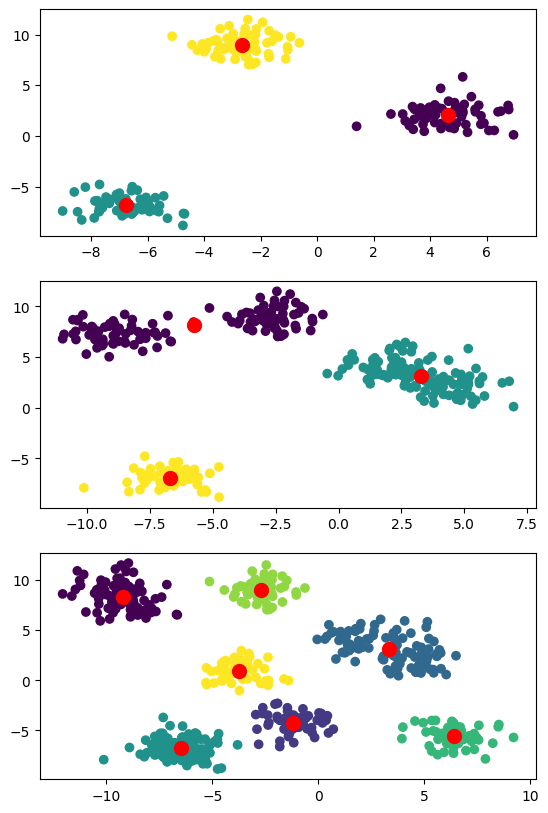

In [13]:
list_of_kmeans = macro_kmeans(list_of_blobs, [3, 3, 7])    
scatter_kmeans(list_of_blobs, list_of_kmeans)

Во втором чет плохо

выполнить кластеризацию с помощью DBSCAN тремя способами (самостоятельно задать или подобрать 3 пары параметров для этого алгоритма)

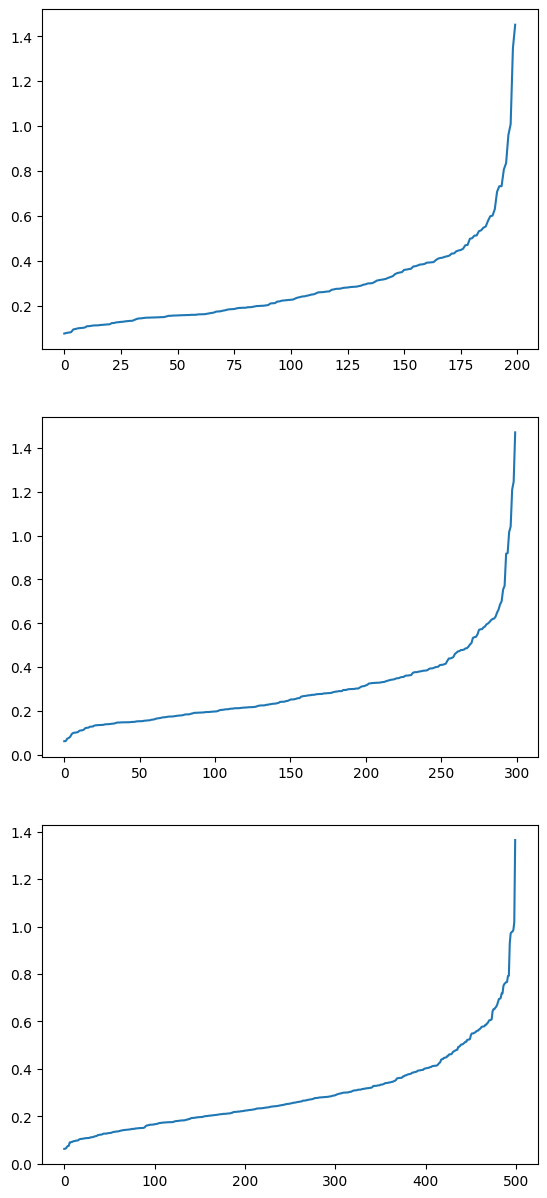

In [14]:
def macro_neighbours_and_visualise(blobs):
    d = []
    fig, ax = plt.subplots(len(blobs))
    for i in range(len(blobs)):
        nbrs = NearestNeighbors(n_neighbors=4).fit(blobs[i][0])
        distances, indices = nbrs.kneighbors(blobs[i][0])
        distances = np.mean(distances, axis=1)
        distances = np.sort(distances)
        d.append(distances)
        ax[i].plot(distances)
    fig.set_figheight(15)
    return d
list_of_neighbours = macro_neighbours_and_visualise(list_of_blobs)

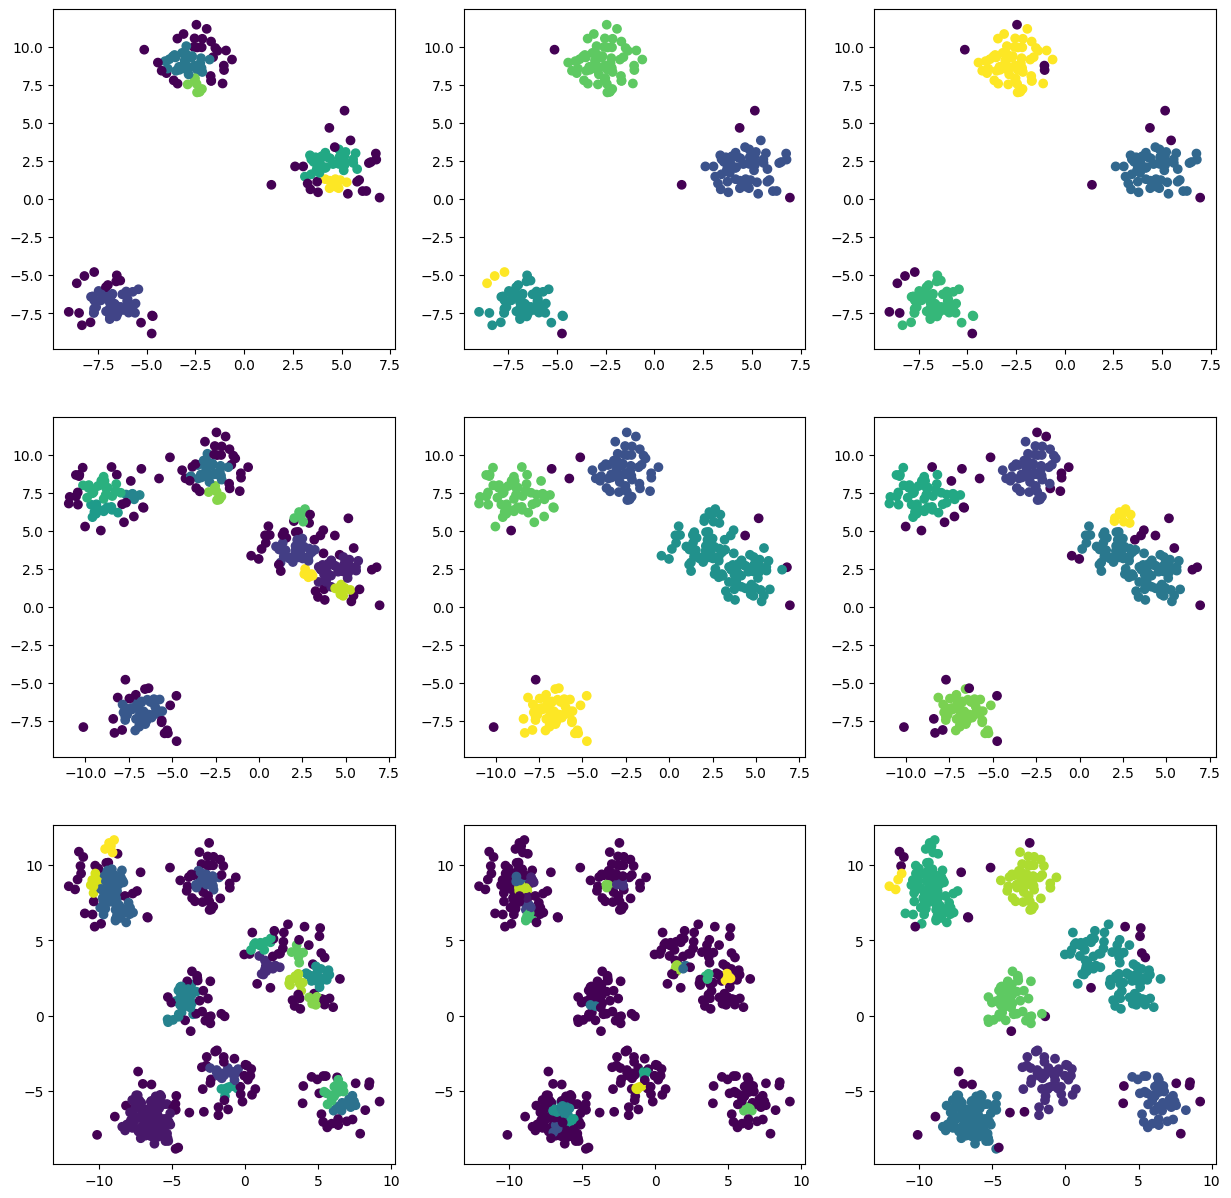

In [15]:
def DBSCAN_visualise(blobs, epsis, samples):
    fig, axs = plt.subplots(len(blobs), 3)
    for i in range(len(blobs)): 
        dbscan = DBSCAN().fit(blobs[i][0]) # без параметров
        axs[i][0].scatter(blobs[i][0][:,0], blobs[i][0][:,1], c=dbscan.labels_)
        dbscan = DBSCAN(eps=random.random(), min_samples=random.randrange(2, 10)).fit(blobs[i][0]) # на глазок
        axs[i][1].scatter(blobs[i][0][:,0], blobs[i][0][:,1], c=dbscan.labels_)
        dbscan = DBSCAN(eps=epsis[i], min_samples=samples[i]).fit(blobs[i][0])
        axs[i][2].scatter(blobs[i][0][:,0], blobs[i][0][:,1], c=dbscan.labels_)
    fig.set_figheight(15)
    fig.set_figwidth(15)
DBSCAN_visualise(list_of_blobs, [0.75, 0.65, 0.8], [4, 4, 4])

Очевидно, что из трех видов параметров: по умолчанию, выбранных случайно и выбранных по локтю, лучшими оказались третьи

Самостоятельно реализовать KMeans с возможностью подсчета суммы квадратов расстояний до центроидов.

In [16]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeansNew:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train): # k++
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        centroids = np.unique(centroids, axis=0)
        return centroids, centroid_idxs


Провести кластеризацию всех датасетов с использованием собственной реализации Kmeans.

In [17]:
def macro_kmeans_new(blobs: list, centers: list[int]) -> list:
    a = [KMeansNew(i) for i in centers]
    for i in range(len(a)):
        a[i].fit(blobs[i][0])
    return a

list_of_kmeans_new = macro_kmeans_new(list_of_blobs, [3, 5, 10])

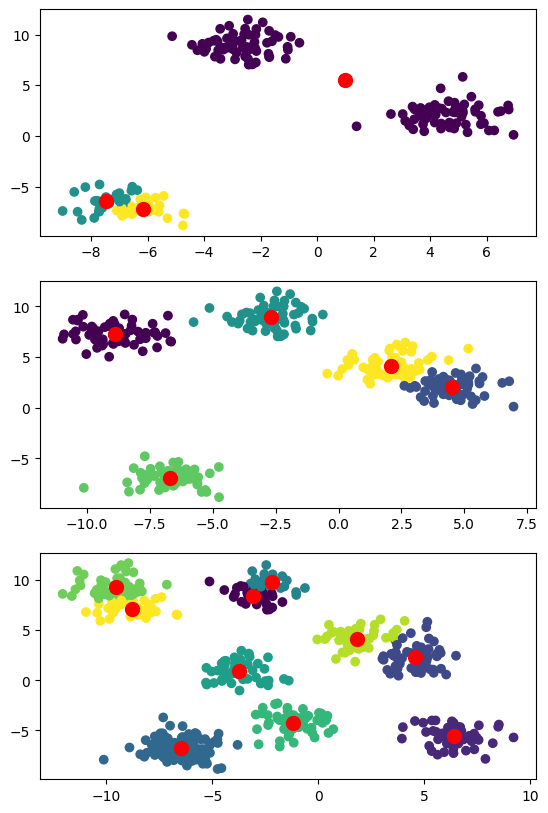

In [18]:
def scatter_kmeans_new(blobs: list, kmeans: list):
    fig, axs = plt.subplots(3)
    for i in range(len(blobs)):
        centroids, centroid_idxs = kmeans[i].evaluate(blobs[i][0])
        axs[i].scatter(blobs[i][0][:,0], blobs[i][0][:,1], c=centroid_idxs)
        axs[i].scatter(centroids[:,0], centroids[:,1], s=100, c='red')
    fig.set_figheight(10)

scatter_kmeans_new(list_of_blobs, list_of_kmeans_new)

Доп: Реализовать базовый вариант алгоритма DBScan и провести кластеризацию всех датасетов с его помощью.

Метод fit проверяет количество соседей у неотмеченных точек, если пацан один - шумный слишком. Создаем новый кластер, создаем очередь и докидываем туда новых соседей, пока один кластер не закончится (сканирование).

In [105]:
from queue import Queue
class DBSCANNew():
    def __init__(self, df, eps=1, min_samples=5):
        self.df = df
        self.epsilon = eps
        self.min_points = min_samples
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        self.df = np.append(self.df, np.array([[-1]*len(self.df)]).reshape(-1,1), axis=1)
        for x in range(len(self.df)):
            if self.df[x,2] != -1:
                continue
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue
            self.cluster_label += 1
            self.df[x,2] = self.cluster_label
            found_neighbors = neighbors
            q = Queue()
            for x in neighbors:
                q.put(x)
            while q.empty() == False:
                current = q.get()
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label
                if self.df[current,2] != -1:
                    continue
                self.df[current,2] = self.cluster_label
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                if len(neighbors2) >= self.min_points:
                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)                           
    
    def predict(self, x):
        preds = []
        for point in x:
            neighbors = self.rangeQuery(point)
            label = self.df[neighbors[0],2]
            preds.append(label)
        return preds
    
    def rangeQuery(self, x):
        neighbors = []
        for y in range(len(self.df)):
            q = self.df[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
        return neighbors
    
    def dist(self, point1, point2):
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2
        return np.sqrt(p1 + p2)

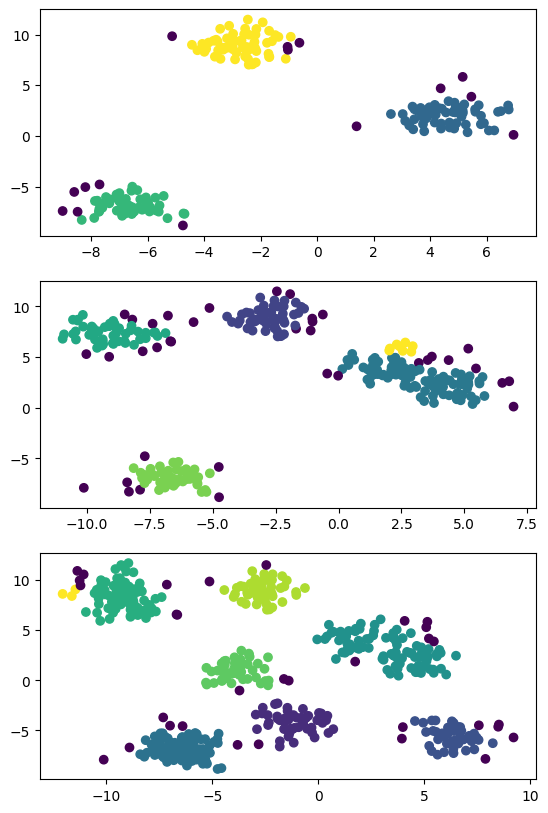

In [110]:
def DBSCANNew_visualise(blobs, epsis, samples):
    fig, axs = plt.subplots(len(blobs))
    for i in range(len(blobs)):
        dbscan = DBSCANNew(blobs[i][0], eps=epsis[i], min_samples=samples[i])
        dbscan.fit()
        axs[i].scatter(blobs[i][0][:,0], blobs[i][0][:,1], c=dbscan.predict(blobs[i][0]))
    fig.set_figheight(10)
DBSCANNew_visualise(list_of_blobs, [0.75, 0.65, 0.8], [4, 4, 4])